In [1]:
from landlab.components.submarine_diffusion.create_initial_profile import create_initial_profile
from landlab.components.submarine_diffusion.utils2 import find_shoreline2
from landlab.components import SubmarineDiffuser
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
import numpy as np

In [3]:
from landlab import RasterModelGrid, CLOSED_BOUNDARY
grid = RasterModelGrid((3,200), spacing = 500.)
grid.status_at_node[grid.nodes_at_top_edge]    = CLOSED_BOUNDARY
grid.status_at_node[grid.nodes_at_bottom_edge] = CLOSED_BOUNDARY

In [4]:
z = create_initial_profile(grid.x_of_node)
grid.add_field('topographic__elevation', z.copy(), at='node')

array([ 15.8       ,  15.4       ,  15.        ,  14.6       ,
        14.2       ,  13.8       ,  13.4       ,  13.        ,
        12.6       ,  12.2       ,  11.8       ,  11.4       ,
        11.        ,  10.6       ,  10.2       ,   9.8       ,
         9.4       ,   9.        ,   8.6       ,   8.2       ,
         7.8       ,   7.4       ,   7.        ,   6.6       ,
         6.2       ,   5.8       ,   5.4       ,   5.        ,
         4.6       ,   4.2       ,   3.8       ,   3.4       ,
         3.        ,   2.6       ,   2.2       ,   1.8       ,
         1.4       ,   1.        ,   0.6       ,   0.2       ,
        -2.01254646,  -5.44066082,  -8.22107857, -10.4970697 ,
       -12.38021299, -13.95740606, -15.29632487, -16.4496755 ,
       -17.45850548, -18.35478266, -19.16340364, -19.90375791,
       -20.590946  , -21.23672823, -21.85026354, -22.43868493,
       -23.00754758, -23.56117787, -24.10294517, -24.63547359,
       -25.16080674, -25.68053622, -26.19590155, -26.70

In [5]:
grid

In [6]:
grid.x_of_node
len(grid.x_of_node)

600

In [7]:
z0 =z

19656.024615233764
19656.024615233764


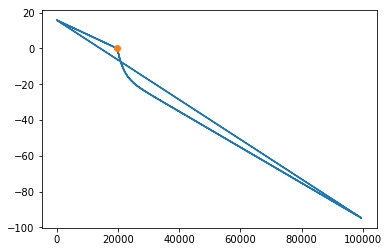

In [8]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z[grid.core_nodes], 0.)
plt.plot(grid.x_of_node,z,shore,0,'o' )

In [ ]:
sd = SubmarineDiffuser(grid, shore)

In [ ]:
len (z)

In [ ]:
k = sd.calc_diffusion_coef(shore)

In [ ]:
plt.plot(grid.x_of_node,k)

In [ ]:
k = sd.grid.at_node['kd'].copy()
grid.x_of_cell[48]
sd.grid.at_node['topographic__elevation'][200] = sd.grid.at_node['topographic__elevation'][201]

In [ ]:
for time_step in range(1000):
    sd.run_one_step(100)

In [ ]:
z1 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z)

In [ ]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z1[grid.core_nodes], 0.)

In [ ]:
shore

In [ ]:
for time_step in range(1000):
    sd.run_one_step(300)
    z2 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z, grid.x_of_node,z2)

In [ ]:
z2

In [ ]:
shore = find_shoreline(grid.x_of_node[grid.core_nodes], z2[grid.core_nodes], 0.)
shore

In [ ]:
for time_step in range(1000):
    sd.run_one_step(100)
    z3 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z, grid.x_of_node,z2, grid.x_of_node,z3)

In [ ]:
plt.plot(grid.x_of_node,z1-z)

In [ ]:
z3

In [ ]:
shore = find_shoreline(grid.x_of_node[grid.core_nodes], z3[grid.core_nodes], 0.)
shore

In [ ]:
shore1 = find_shoreline(grid.x_of_node[grid.core_nodes], z2[grid.core_nodes], 0.)
shore1

In [ ]:
for time_step in range(1000):
    sd.run_one_step(100)
    z4 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z, grid.x_of_node,z2, grid.x_of_node,z4)

In [ ]:
z4 = sd.grid.at_node['topographic__elevation']
z4

In [ ]:
# z1 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1-z,)

In [ ]:
k1 = sd.grid.at_node['kd']
k1

In [ ]:
plt.plot(grid.x_of_node[grid.core_nodes],k1[grid.core_nodes]-k[grid.core_nodes],)


In [ ]:
k1-k